In [1]:
from os.path import join, abspath
from os import getcwd

import matplotlib.pyplot as plt
import numpy as np
import pickle
from skimage.transform import resize

In [2]:
data_dir = abspath(join(getcwd(), '../../'))

In [3]:
# load covariance analysis
with open(data_dir + '/models/results/covariance_analysis/v1_wn_covariance.pickle', 'rb') as file:
    results = pickle.load(file)
cov_mat = results['covariance']
evecs = results['evecs']
evals = results['evals']

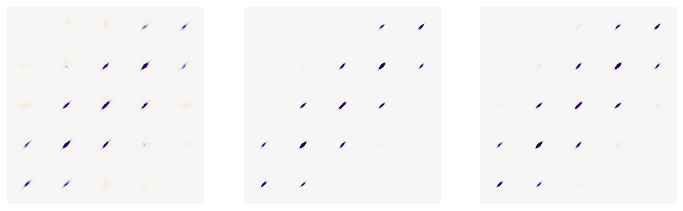

In [4]:
# plot the covariance matrices
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 3, 1)
plt.imshow(cov_mat['data'], cmap='PuOr') # PiYG_r
plt.clim(-5, 5)
plt.axis('off')
plt.xlim(180, 360)
plt.ylim(180, 360)

ax = fig.add_subplot(1, 3, 2)
plt.imshow(cov_mat['model'], cmap='PuOr')
plt.clim(-5, 5)
plt.axis('off')
plt.xlim(180, 360)
plt.ylim(180, 360)

ax = fig.add_subplot(1, 3, 3)
plot = plt.imshow(cov_mat['finite'], cmap='PuOr')
plt.clim(-5, 5)
plt.axis('off')
plt.xlim(180, 360)
plt.ylim(180, 360)
plt.savefig(data_dir + '/reports/figures/paper_figs/figure_5/covmat_v1_wn.pdf', 
            dpi=300, transparent=True,
           bbox_inches = 'tight', pad_inches = 0)

# save the colorbar separately
fig, ax = plt.subplots(figsize=(8, 4))
cbar = plt.colorbar(plot, ax=ax)
cbar.set_ticks([])
ax.remove()
# plt.savefig(data_dir + '/reports/figures/paper_figs/figure_5/covmat_v1_colorbar.pdf', 
#             dpi=300, transparent=True,
#            bbox_inches = 'tight', pad_inches = 0)

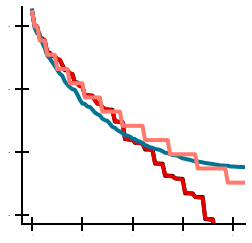

In [57]:
# plot the eigenvalues
evals['data'] /= np.sum(evals['data'])
evals['model'] /= np.sum(evals['model'])
evals['finite'] /= np.sum(evals['finite'])
evals['analytical'] /= np.sum(evals['analytical'])


t = 100
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
plt.semilogy(np.flip(evals['model'])[:t], '-', lw=4, c='#000000', alpha=1)
plt.semilogy(np.flip(evals['finite'])[:t], '-', lw=4, c='#e50000', alpha=1)
plt.semilogy(np.flip(evals['data'])[:t], '-', lw=4, c='#047495', alpha=1)
plt.semilogy(np.flip(evals['analytical'])[:t], '-', lw=4, c='#ff796c', alpha=1)
# plt.ylabel('Variance')
# plt.xlabel('PC dimension')

# format ticks
ax.tick_params(axis = 'both', which = 'major', direction='inout', labelsize = 0, width=2, length=14)
ax.tick_params(axis = 'both', which = 'minor', direction='inout', labelsize = 0, width=0, length=0)
plt.xlim(-4, 85)
plt.ylim(7 * 1E-5, 2E-1)
plt.yticks([1E-4, 1E-3, 1E-2, 1E-1])
plt.xticks(np.arange(0, 85, 20))

# format axes
for axis in ['left', 'bottom']:
    ax.spines[axis].set_linewidth(2)
for axis in ['top', 'right']:
    ax.spines[axis].set_visible(False)

plt.savefig(data_dir + '/reports/figures/paper_figs/figure_5/evals_v1_wn.pdf', 
            dpi=300, transparent=True,
           bbox_inches = 'tight', pad_inches = 0)

In [37]:
np.sum(evals['data'][-:])

0.8609996570168199

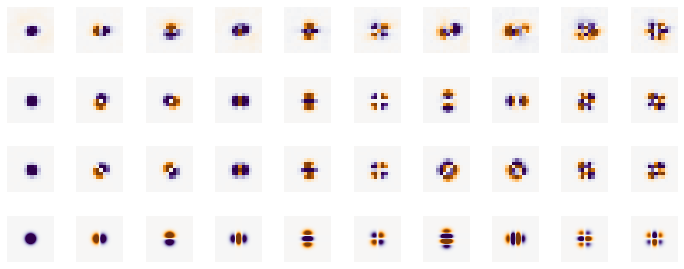

In [30]:
# plot eigenvectors
dim = (14, 36)

# sign flips
t =[-1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] # model & finite sign
u = [1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] # analytical sign


# order
m = [0, 1, 2, 3, 4, 5, 8, 9, 6, 7, 8, 9, 10, 11, 12] # model order
a = [0, 2, 1, 4, 5, 3, 9, 8, 6, 7, 8, 9, 10, 11, 12] # analytical order

factor = 1 # resize factor
fig = plt.figure(figsize=(12, 5))
for i in range(10):
    ax = fig.add_subplot(4, 10, i + 1)
    img = evecs['data'][:, - i-1].reshape(dim)[:, 11:25]
    img = resize(img, (img.shape[0] // factor, img.shape[1] // factor), anti_aliasing=True)
    plt.imshow(img, cmap='PuOr')
    plt.clim(-0.2, 0.2)
    plt.axis('off')
    
    ax = fig.add_subplot(4, 10, 10 + i + 1)
    img = evecs['model'][:, -m[i]-1].reshape(dim)[:, 11:25]
    img = resize(img, (img.shape[0] // factor, img.shape[1] // factor), anti_aliasing=True)
    plt.imshow(img * t[i], cmap='PuOr')
    plt.clim(-0.2, 0.2)
    plt.axis('off')
    
    ax = fig.add_subplot(4, 10, 20 + i + 1)
    img = evecs['finite'][:,  - m[i] - 1].reshape(dim)[:, 11:25]
    img = resize(img, (img.shape[0] // factor, img.shape[1] // factor), anti_aliasing=True)
    plt.imshow(img * t[i], cmap='PuOr')
    plt.clim(-0.2, 0.2)
    plt.axis('off')
    
    ax = fig.add_subplot(4, 10, 30 + i + 1)
    img = evecs['analytical'][a[i]].reshape(dim[0] * 10, dim[1] * 10)[:, 110:250]
    plt.imshow(img * u[i], cmap='PuOr')
    plt.clim(-0.3, 0.3)
    plt.axis('off')

# plt.tight_layout()
plt.subplots_adjust(wspace=0.5, hspace=0.1)
plt.savefig(data_dir + '/reports/figures/paper_figs/figure_5/evecs_v1_wn.pdf', 
            dpi=300, transparent=True,
           bbox_inches = 'tight', pad_inches=0)

In [103]:
evecs['data'][:, - i-1].shape

(504,)

In [107]:
196 / 2

98.0

In [97]:
np.sqrt(250)

15.811388300841896

In [99]:
196 + 196

392

In [106]:
25 - 11

14

In [25]:
903 / 321 * 3

8.439252336448599